<a href="https://colab.research.google.com/github/Hrotich/ML-IP-WEEK2/blob/main/INDEPENDENT_PRPJECT_WEEK_2_SUPERVISED_LEARNING_REGRESSION_%2C_HARON_KIPKOECH_ROTICH_DSC12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Defining the Question

a) Specifying the Question 

What factors affect Housing prices and which is the best model that can be used to predict House price?

b) Defining the Metric for Success

The metric for success in this case is  to find which of the factors has impact on house price  and determine which best  regression model gives  best prediction

c) Understanding the context

 Hass Consulting Company  has been a leading real estate company for a number of years,it is concerned about the factors that have impact on the prices of houses  in the  region. The data  provided  have a number of entries that carries  important infor mation. The variables in the dataset are : Id,price,bedrooms ,bathrooms ,sqft_living,sqft_lot ,floors ,waterfront,view ,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,lon,sqft_living15,and sqft_lot15




In [1]:
# importing libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# loading data set
h_df = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

In [3]:
# to pre-view the top of our dataset
h_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# to pre- view the bottom of dataset
h_df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
# to check on number of entries
h_df.shape

(21613, 20)

In [6]:
# to check for dtypes
h_df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# to check for information details
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

Data Cleaning

In [8]:
# to check for missing values
# there is no missing values hence no treatment
h_df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# to check for duplicates
h_df.duplicated().any().sum()
 # to drop the duplicate
h_df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [10]:
# to drpo  irrelevant columns
h_df.drop(['id', 'long','long'], axis='columns', inplace=True)


UNIVARIATE ANALYSIS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb35e3cbfd0>]],
      dtype=object)

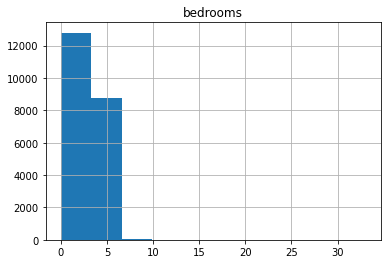

In [11]:
# histogram
h_df.hist(column='bedrooms')

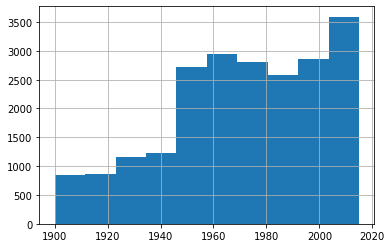

In [12]:
# histogram for the distribution of years in which houses were built
h_df['yr_built'].hist()

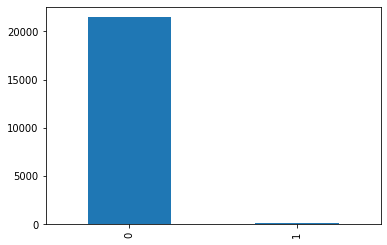

In [13]:
# bar plot showing the houses with waterfronts
h_df['waterfront'].value_counts().sort_index().plot.bar()

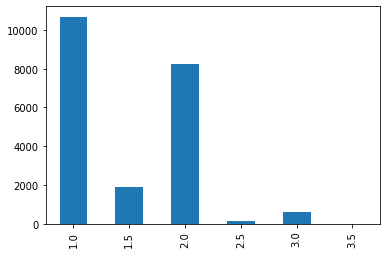

In [14]:
# bar plots for  number of floors that houses have
h_df['floors'].value_counts().sort_index().plot.bar()

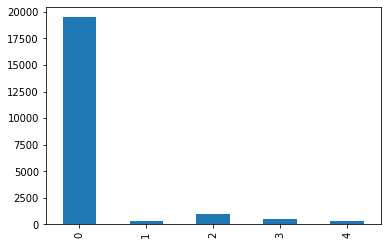

In [15]:
#	bar plots for number of views in houses
h_df['view'].value_counts().sort_index().plot.bar()

In [16]:
#measure of central tendecy
# mean for every variable
print(h_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15']].mean())


price            540182.158793
bedrooms              3.370842
bathrooms             2.114757
sqft_living        2079.899736
sqft_lot          15106.967566
floors                1.494309
waterfront            0.007542
view                  0.234303
condition             3.409430
grade                 7.656873
sqft_above         1788.390691
sqft_basement       291.509045
yr_built           1971.005136
yr_renovated         84.402258
zipcode           98077.939805
sqft_living15      1986.552492
sqft_lot15        12768.455652
dtype: float64


In [17]:
# mode in the variables
print(h_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15']].mode())


      price  bedrooms  bathrooms  ...  zipcode  sqft_living15  sqft_lot15
0  350000.0       3.0        2.5  ...  98103.0         1540.0      5000.0
1  450000.0       NaN        NaN  ...      NaN            NaN         NaN

[2 rows x 17 columns]


In [18]:
# median for every variables
print(h_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15']].median())


price            450000.00
bedrooms              3.00
bathrooms             2.25
sqft_living        1910.00
sqft_lot           7618.00
floors                1.50
waterfront            0.00
view                  0.00
condition             3.00
grade                 7.00
sqft_above         1560.00
sqft_basement         0.00
yr_built           1975.00
yr_renovated          0.00
zipcode           98065.00
sqft_living15      1840.00
sqft_lot15         7620.00
dtype: float64


MEASURES OF DISPERSION

In [19]:
# to get standaerd deviation
h_df.std()

price            367362.231718
bedrooms              0.930062
bathrooms             0.770163
sqft_living         918.440897
sqft_lot          41420.511515
floors                0.539989
waterfront            0.086517
view                  0.766318
condition             0.650743
grade                 1.175459
sqft_above          828.090978
sqft_basement       442.575043
yr_built             29.373411
yr_renovated        401.679240
zipcode              53.505026
lat                   0.138564
sqft_living15       685.391304
sqft_lot15        27304.179631
dtype: float64

In [20]:
# to get variance
h_df.var()

price            1.349550e+11
bedrooms         8.650150e-01
bathrooms        5.931513e-01
sqft_living      8.435337e+05
sqft_lot         1.715659e+09
floors           2.915880e-01
waterfront       7.485226e-03
view             5.872426e-01
condition        4.234665e-01
grade            1.381703e+00
sqft_above       6.857347e+05
sqft_basement    1.958727e+05
yr_built         8.627973e+02
yr_renovated     1.613462e+05
zipcode          2.862788e+03
lat              1.919990e-02
sqft_living15    4.697612e+05
sqft_lot15       7.455182e+08
dtype: float64

In [21]:
# to find skewness

h_df.skew()

# our data is positively skewed


price             4.021716
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

In [22]:
# kurtosis test
# to test for kurtosis
h_df.kurt()

price             34.522444
bedrooms          49.063653
bathrooms          1.279902
sqft_living        5.243093
sqft_lot         285.077820
floors            -0.484723
waterfront       127.632494
view              10.893022
condition          0.525764
grade              1.190932
sqft_above         3.402304
sqft_basement      2.715574
yr_built          -0.657408
yr_renovated      18.701152
zipcode           -0.853479
lat               -0.676313
sqft_living15      1.597096
sqft_lot15       150.763110
dtype: float64

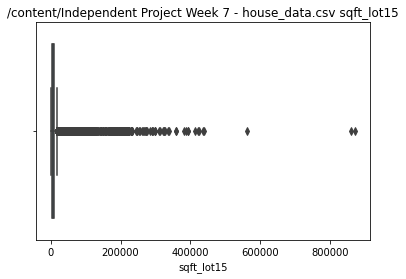

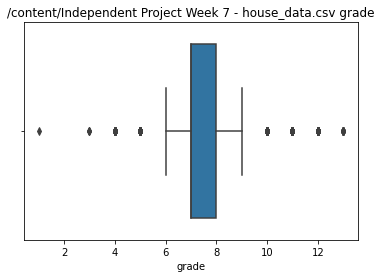

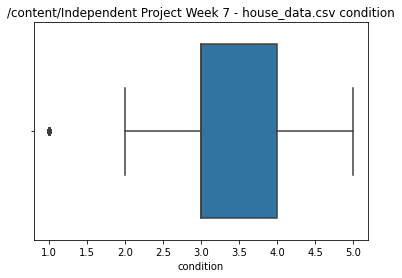

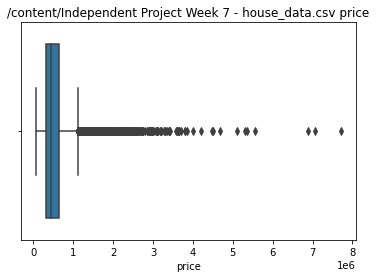

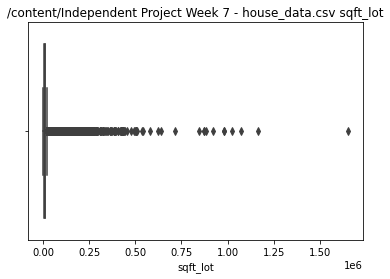

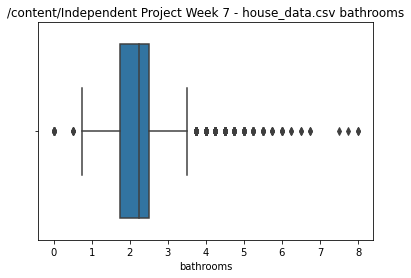

In [23]:
# box plot for different variables
def boxplot(column):
    sns.boxplot(data=h_df,x=h_df[f"{column}"])
    plt.title(f"/content/Independent Project Week 7 - house_data.csv {column}")
    plt.show()

boxplot('sqft_lot15')
boxplot('grade')
boxplot('condition')
boxplot('price')
boxplot('sqft_lot')
boxplot('bathrooms')


BIVARIATE ANALYSIS

Text(0.5, 1.0, 'price vs  bedrooms')

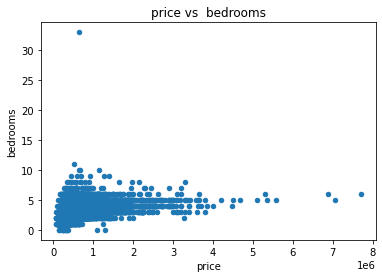

In [24]:
#Plotting our scatterplot to compare the variables
h_df.plot(x = 'price', y = 'bedrooms', kind='scatter')
# naming our scatterplot a title
plt.title('price vs  bedrooms')

Text(0.5, 1.0, 'price vs  bedrooms')

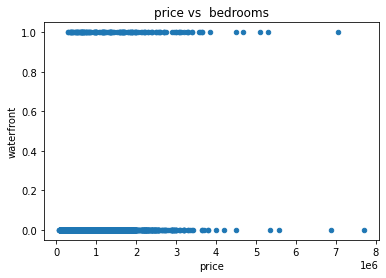

In [25]:
# scatterplots
h_df.plot(x = 'price', y = 'waterfront', kind='scatter')
# naming our scatterplot a title
plt.title('price vs  bedrooms')

Text(0.5, 1.0, 'price vs  bedrooms')

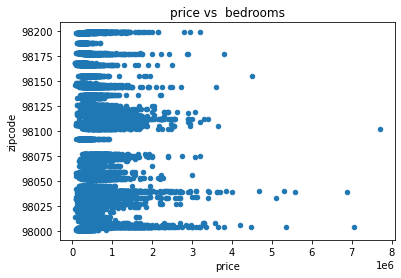

In [26]:
h_df.plot(x = 'price', y = 'zipcode', kind='scatter')
# naming our scatterplot a title
plt.title('price vs  bedrooms')

Text(0.5, 1.0, 'price vs  sqft_living ')

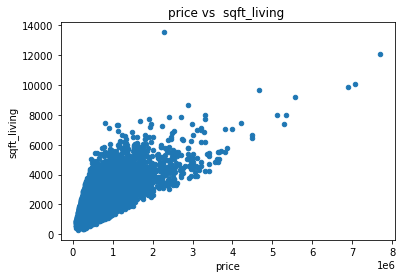

In [27]:
# scatter plot
h_df.plot(x = 'price', y = 'sqft_living', kind='scatter')
# naming our scatterplot a title
plt.title('price vs  sqft_living ')

Text(0.5, 1.0, 'price vs  sqft_basement')

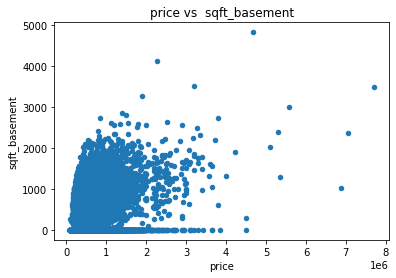

In [28]:
#
# scatter plot
h_df.plot(x = 'price', y = 'sqft_basement', kind='scatter')
# naming our scatterplot a title
plt.title('price vs  sqft_basement')

Text(0.5, 1.0, 'price vs  condition')

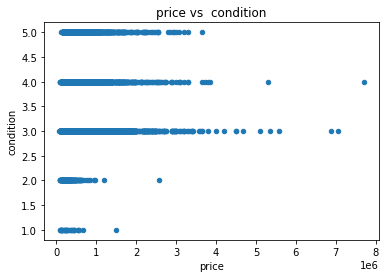

In [29]:
# scatter plot
h_df.plot(x = 'price', y = 'condition', kind='scatter')
# naming our scatterplot a title
plt.title('price vs  condition')


In [30]:

# to create correlation matrix
h_df.corr()
# a negative correlation is witnessed between the price and Zipcode and positive correlation between price and other factors


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.713202,0.119248


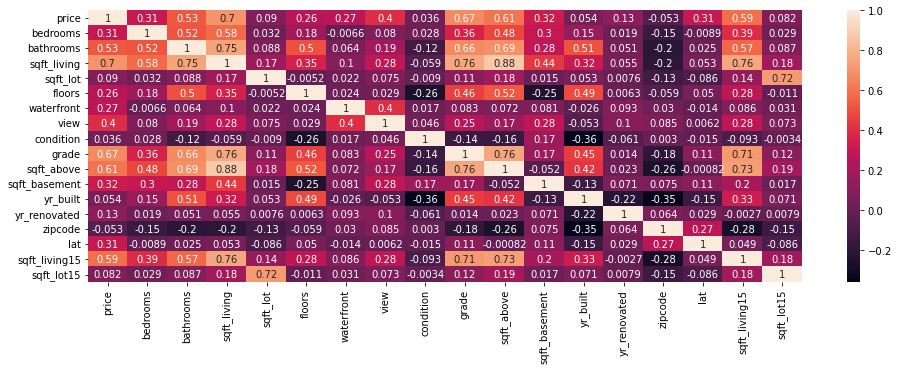

In [31]:
#heat map
plt.figure(figsize = (16,5))
sns.heatmap(h_df.corr(),annot=True)
plt.show()
#there is a strong negative correlation between floorsand condition of -0.26
#yr built and condition have negative correlation of -0.36
# zipcode and sqftabove have strong negative correlation
# sqft_living and price have strong positive correlation of 0.7
#aqft_living and  bathrooms have strong positive correlation of 0.75

In [32]:
# frequency table
pd.crosstab(index=h_df['price'], columns=h_df['view'])



view,0,1,2,3,4
price,,,,,
75000.0,1,0,0,0,0
78000.0,1,0,0,0,0
80000.0,1,0,0,0,0
81000.0,1,0,0,0,0
82000.0,1,0,0,0,0
...,...,...,...,...,...
5350000.0,0,0,0,0,1
5570000.0,1,0,0,0,0
6890000.0,0,0,0,0,1


MULTIVARIATE ANALYSIS

In [33]:
# the Pricipal Component analysis is used
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

In [34]:
# to  fit  our data to the  PCA model
data_scaler.fit(h_df)

StandardScaler()

In [35]:
# to scale our data
scaled_df = data_scaler.transform(h_df)

In [37]:
# initiating pca instant
pca = PCA(n_components = 2)

In [38]:
# fitting our model
pca.fit(scaled_df)

PCA(n_components=2)

In [39]:
#to check for accuracy of the model
x_pca = pca.transform(scaled_df)

print(x_pca.shape)

print(h_df.shape)

(21613, 2)
(21613, 18)


Text(0, 0.5, 'Second Principal Component')

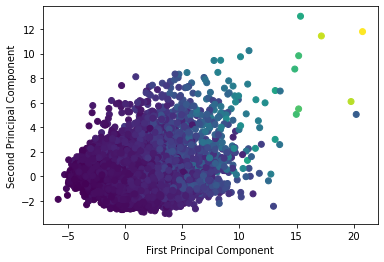

In [40]:
# to visualize the target variable( price) 
# scatter plot
plt.scatter(x_pca[:,0],x_pca[:,1], c=h_df['price'])

plt.xlabel('First Principal Component')

plt.ylabel('Second Principal Component')

REGRESSION ANALYSIS

Multiple regression

In [41]:
# to check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
# to compute  VIF for each variable
X = h_df.iloc[:,:-1]
calc_vif(X)


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,price,1.037590e+01
1,bedrooms,2.357317e+01
2,bathrooms,2.880141e+01
3,sqft_living,inf
4,sqft_lot,1.208259e+00
5,floors,1.678038e+01
6,waterfront,1.275601e+00
7,view,1.595015e+00
8,condition,3.490803e+01
9,grade,1.588403e+02


In [43]:
#to drop the  columns with high correlation
X = h_df.drop(['yr_built','sqft_above','sqft_basement','sqft_living'],axis=1)
calc_vif(X)

,variables,VIF
0,price,8.408575
1,bedrooms,20.279229
2,bathrooms,21.188539
3,sqft_lot,2.356532
4,floors,13.142217
5,waterfront,1.265159
6,view,1.519653
7,condition,32.208322
8,grade,139.624828
9,yr_renovated,1.091459


In [44]:
# multilinear regression
#separate the other attributes from the predicting attribute
#Setting the value for X and Y
x = h_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'sqft_living15', 'sqft_lot15']]
y = h_df['price']


In [45]:
# splitting data
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 40)

In [46]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [47]:
# making prediction
y_prediction =  LR.predict(x_test)
y_prediction

array([1018054.31074242,  743954.6479293 ,  370667.95497559, ...,
        581357.18815501,  807187.00570798,  370030.32633447])

In [48]:
# to test for model accuracy
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 0.6953654150130648
mean_sqrd_error is== 38371810381.63939
root_mean_squared error of is== 195887.23894536722


Quantile regression

In [49]:
# quantile regression libaries
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
mod = smf.quantreg('y ~ x', h_df)

res = mod.fit(q=.3)

print(res.summary())

In [53]:
#implementing ridge regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [54]:
X = h_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'sqft_living15', 'sqft_lot15']]
y = h_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [55]:
# ridge model
ridge_model = Ridge(alpha = 5).fit(X_train, y_train)

In [56]:
# calling the coefficients
ridge_model.coef_

array([-4.19456397e+04,  4.67996636e+04,  1.09345226e+02,  5.17369687e-02,
        9.33439941e+03,  5.92842723e+05,  5.71190190e+04,  2.64303460e+04,
        1.00908605e+05,  6.67054345e+01,  4.26399295e+01, -2.95345500e+03,
        2.23973724e+01, -3.65474870e+02,  5.81077725e+05,  1.75078068e+01,
       -4.45946093e-01])

In [57]:
# to check for intercept
ridge_model.intercept_

13327775.561578367

In [58]:
# creating random set aplha
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [59]:
# to save and set lambda
lambda_values = 10**np.linspace(10,-2,100)*0.5


In [60]:
ridge_model = Ridge()
coefficients = []

for i in lambda_values:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    coefficients.append(ridge_model.coef_)

In [61]:
# prediction of model
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_train)

In [62]:
# to compute Root mean squared error
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

204523.9779596522

In [63]:
#to perform cross validation 
# computing the RMSE with the train_ set
# Rmse increases after cross validation 
from sklearn.model_selection import cross_val_score
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

205196.15379095532

In [64]:
# making prediction for test set
y_pred = ridge_model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

196973.62800102134

LASSO REGRESION

In [65]:
# library
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [69]:
# Create an instance of Lasso Regression implementation
#
lasso = Lasso(alpha=1)

In [88]:
#Fit the Lasso model
#
lasso.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.098e+14, tolerance: 2.229e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=1)

In [74]:
# to Create the model score
#

lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(0.6951988000452676, 0.6957622806122787)

In [75]:
# to check for Lasso coefficients
lasso.coef_

array([-4.17122714e+04,  4.68227137e+04,  2.86390096e+02,  5.44370629e-02,
        9.01038169e+03,  6.22254174e+05,  5.60214636e+04,  2.65500119e+04,
        1.00700845e+05, -1.10435067e+02, -1.34717073e+02, -2.94227399e+03,
        2.22365892e+01, -3.71360183e+02,  5.91977309e+05,  1.74052052e+01,
       -4.45435359e-01])

In [77]:
# creating an instance

lasso_cv = LassoCV(cv=5)

In [90]:
# fitting  the lsso model
#
lasso_cv.fit(X, y)

LassoCV(cv=5)

In [89]:
 #Create the model score
#
lasso_cv.score(X, y)

0.5225403948681555

Elastic Net Regression


In [107]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [108]:
# elastic net model and normalization of data
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[1]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [113]:
# model fitting
search.fit(X,y)
search.best_params_
abs(search.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increas

41593725794.500336

In [111]:
elastic=ElasticNet(normalize=True,alpha=1.0,l1_ratio=1)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,


41020471283.44866


In [112]:
#  the coefficients are
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 41969.94153098167,
 'bedrooms': -35053.92253295591,
 'condition': 26035.762996403773,
 'floors': 11343.92120245463,
 'grade': 101560.34026994246,
 'lat': 589757.0053110585,
 'sqft_above': 18.69857588078828,
 'sqft_basement': 0.0,
 'sqft_living': 155.6654466690579,
 'sqft_living15': 12.981208275364743,
 'sqft_lot': 0.06308675415814877,
 'sqft_lot15': -0.4597503746839291,
 'view': 54437.37831737142,
 'waterfront': 587215.6670829117,
 'yr_built': -2894.48583697254,
 'yr_renovated': 17.426518284984144,
 'zipcode': -349.5961617738183}

In [117]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [121]:
#fit multiple linear regression model
model = ols('price ~ bedrooms+ bathrooms+ sqft_living+sqft_lot+ floors+waterfront+ view+ condition+ grade+ sqft_above+ sqft_basement+ yr_built + yr_renovated+zipcode+lat+sqft_living15+sqft_lot15', data=h_df).fit()



In [122]:
#model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     3091.
Date:                Sat, 27 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:42:16   Log-Likelihood:            -2.9475e+05
No. Observations:               21613   AIC:                         5.895e+05
Df Residuals:                   21596   BIC:                         5.897e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.175e+07   2.93e+06      4.004

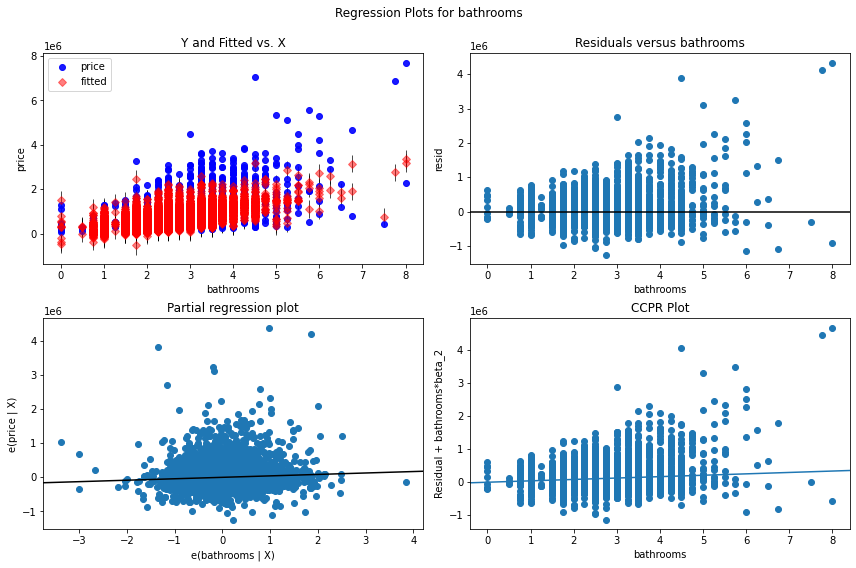

In [124]:
# residual plots for every individual variables
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'bathrooms', fig=fig)

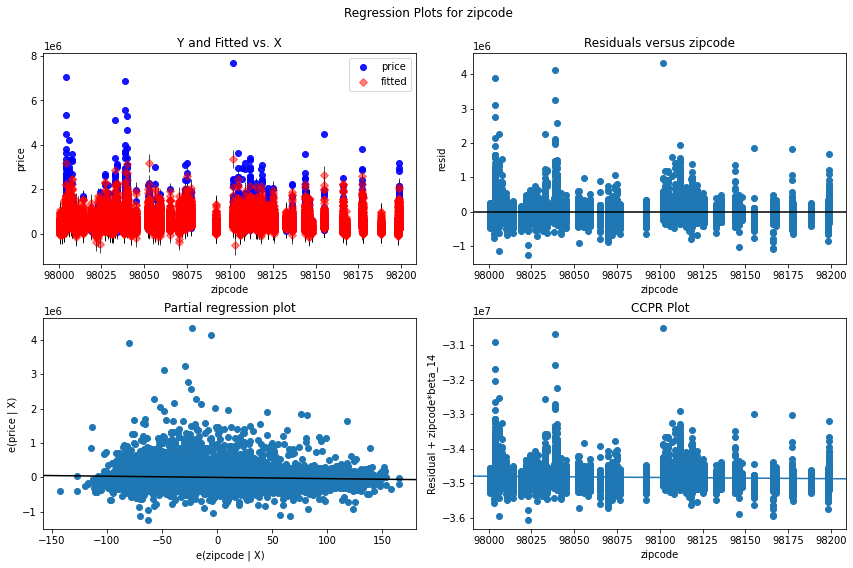

In [125]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'zipcode', fig=fig)

### in both plots the residuals appear to be randomly scattered around zero, indicating that heteroscedasticity is not a problem with either predictor variable in the model.

SUMMARY AND CONCLUSION 

from the findings  we can witness that
 1.sqft_ living comes first with a correlation of 0.7 , followed by grade variable with  corrlation of 0.67 , then bathroom with 0.53, bedrooms with correlation of 0.31, thus the  company have to  consider the sqft_living as the  main  factor and invest more in providing the required  living area that is spacious

 2. the best prediction model to be used in this scenario is the Elastic net regression in that it it incoporates the L1 and L2 algorithyms in its predictions